In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import spacy 
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams
from nltk.corpus import stopwords

#Import necessary packages

In [2]:
df = pd.read_csv("Data/Bitcoin_tweets_clean.csv", parse_dates = ["user_created", "date"]) #Import csv data into a dataframe
                                                                                          #parse necessary dates

#Read in data

In [3]:
df.info() #Prints dataframe info

#Read dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3028948 entries, 0 to 3028947
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   user_name              object        
 1   user_location          object        
 2   user_description       object        
 3   user_created           datetime64[ns]
 4   user_followers         float64       
 5   user_friends           float64       
 6   user_favourites        float64       
 7   user_verified          bool          
 8   date                   datetime64[ns]
 9   text                   object        
 10  source                 object        
 11  processed_text         object        
 12  character_length       int64         
 13  text_complexity_score  float64       
dtypes: bool(1), datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 303.3+ MB


In [4]:
df.head() #Prints top 5 rows of the dataframe

#Investigate DataFrame

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,processed_text,character_length,text_complexity_score
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,True,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,Twitter Web App,blue ridge bank share halted nyse bitcoin atm ...,135,14.97
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532.0,25483.0,True,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",Twitter for Android,today thats thursday take 2 friend btc wallet ...,140,41.70
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332.0,924.0,True,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",Twitter Web App,guy evening read article btc would like share,136,52.19
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129.0,14.0,True,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,dlvr.it,btc big chance billion price 48726440 20210211...,94,97.70
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472.0,10482.0,True,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,Twitter Web App,network secured 9 508 node today soon biggest ...,140,76.22


# User Info

In [5]:
user_df = df.drop_duplicates(subset = ["user_created"], keep = "last") #Drop duplicates in the user_created column, 
                                                                       #keep last occurance of the user_created tweet

user_df = user_df.iloc[:, :8] #Saves the first 7 columns into a new dataframe 

user_df.head() #Prints first 5 rows of the dataframe

#For our analysis we are going to start by subsetting our dataset to create a new DataFrame with only
#unique users info. To do this we have to drop duplicates that have the same user_created time. We
#are using this method as there are many duplicate values with the same user_name but are not the same account. 
#User_created is a better identifier for unique users as it cannot change over time like the other columns.

#We will drop the duplicates only keeping the most recent user info. This method is not perfect as it will 
#elimate some context of user data as user info such as friends, followers, description, and verification are 
#subject to change over time.

#We will perfrom an EDA on this info to get a better understanding of who the users are in our dataset

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified
12,CPUcoin,Cayman Islands,The Sharing Economy for CPU/GPU Power. Revolut...,2018-08-27 15:42:00,5097.0,791.0,52.0,True
21,Crypto M🕶️stache ! 🇧🇪🇯🇴🇳🇱🇮🇪,World,Cryptomaniac 24/7 bullish! \nBelieve in Techno...,2011-05-17 18:14:49,274.0,773.0,6404.0,True
29,Adriana Itzel,NaN,NaN,2021-02-10 23:08:04,0.0,19.0,0.0,True
47,Tonya Barris,NaN,NaN,2020-12-29 16:55:33,0.0,16.0,2.0,True
55,Max Payne Crypto,NaN,NaN,2020-11-12 18:11:58,7.0,36.0,23.0,True


In [6]:
user_df.info() #Prints info of the dataset

#Read dataframe info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449734 entries, 12 to 3028947
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_name         449734 non-null  object        
 1   user_location     219506 non-null  object        
 2   user_description  367134 non-null  object        
 3   user_created      449734 non-null  datetime64[ns]
 4   user_followers    449734 non-null  float64       
 5   user_friends      449734 non-null  float64       
 6   user_favourites   449734 non-null  float64       
 7   user_verified     449734 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), object(3)
memory usage: 27.9+ MB


## Verified Accounts

In [7]:
sns.set(rc = {'figure.figsize':(13,8)}) #Sets seaborn figuresize to 13, 8

#Set seaborn style and size

True     0.251386
False    0.748614
Name: user_verified, dtype: float64


Text(0, 0.5, 'User_verified')

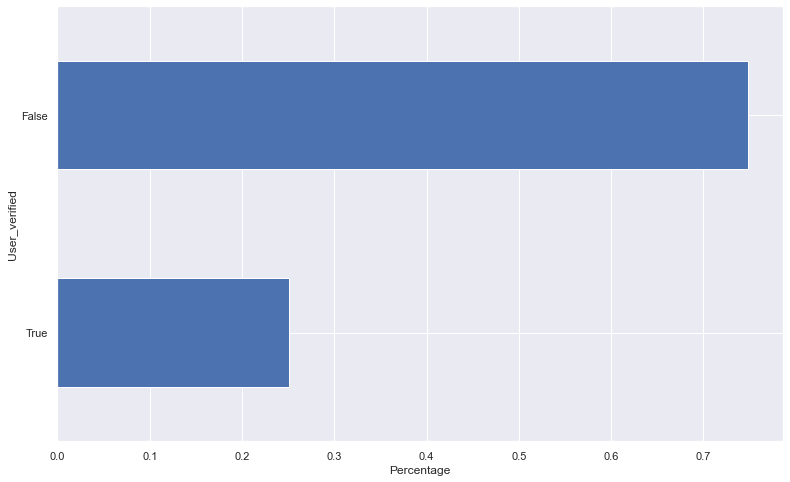

In [8]:
print(user_df["user_verified"].value_counts(normalize = True, ascending = True)) #Print verified account stats

user_df["user_verified"].value_counts(normalize = True, ascending = True)\
                        .plot(kind = "barh", stacked = True) #Plot bar chart of normalized user_verified stats

plt.xlabel("Percentage") #Sets x and y labels for figure
plt.ylabel("User_verified")


#We have 25% Twitter verified accounts, and 75% unverified accounts which is what was more or less expected

## User Location

The total number of unique users are 449734, while the count of those who provided their location are 219506.


Text(0, 0.5, 'user_location')

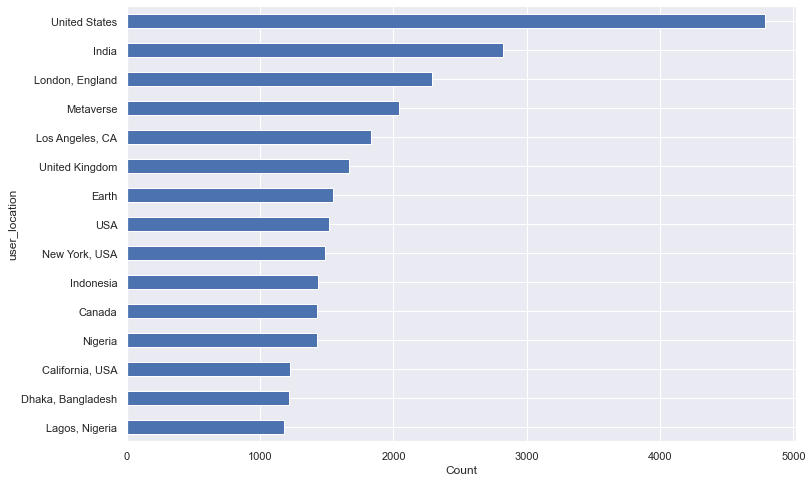

In [9]:
plt.figure(figsize = (12, 8), facecolor = 'white') #Change figure size

user_count = user_df["user_name"].count()           #Create variables to write f string below
location_count = user_df["user_location"].count()

print(f"The total number of unique users are {user_count}, \
while the count of those who provided their location are {location_count}.") #Create f string to print statement 


user_df["user_location"].value_counts().head(15).sort_values().plot.barh() # Plot top 15 user locations

plt.xlabel("Count") #Sets x and y labels for figure
plt.ylabel("user_location")

#Out of 449,734 users we have the location data of 219,506 users which is 48% of all users.
#Plotting the top 10 users we see that location data is not specific and will need to be
#modified for analysis. However, looking at the top 10 locations we see most tweets come
#from the United States

## User Created

In [10]:
user_created_df = user_df.loc[user_df["user_created"] > "2006-01-01 00:00:00", :] #Filter out tweets before twitter was
                                                                                  #created

#We have some incorrectly inputted dates. To remove them we subset the dataframe to remove dates older than 2006

The oldest created account was created in 2006-03-21 20:50:14, while the most recent in 2022-04-22 23:49:02.


<AxesSubplot:xlabel='user_created', ylabel='Count'>

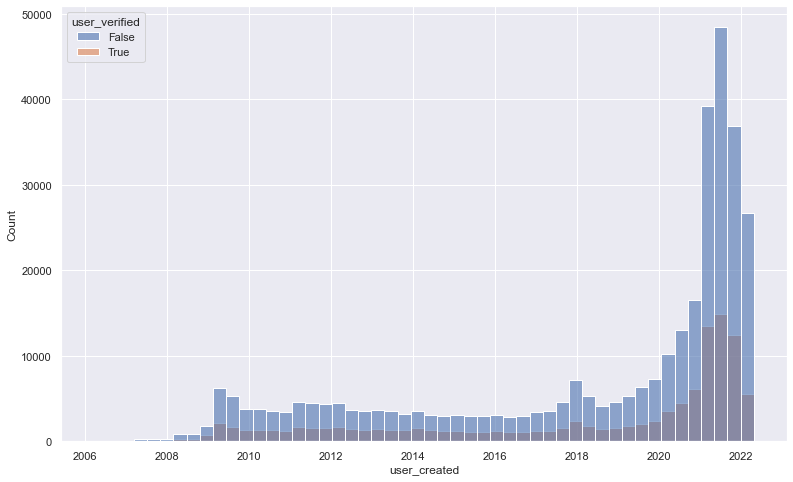

In [11]:
min_date = user_created_df["user_created"].min() #Create min and max variables for f string
max_date = user_created_df["user_created"].max()

print(f"The oldest created account was created in {min_date}, while the most recent in {max_date}.") #Create f string


plt.figure(figsize = (13, 8), facecolor = 'white') #Increase figuresize


sns.histplot(data = user_created_df,  #Creates histogram out of the counts of user_created dates and user_verified  
            x = "user_created",       #accounts with 50 bins and an alpha of 0.6
            alpha = 0.6,
            hue = "user_verified",
            bins = 50)

#Most accounts in the dataset were created between 2010 and 2022 with a huge spike in 2020 and 2021.
#This might tie in with the huge crypto bull run in 2020 and 2021

## User friends, followers, favourites

In [12]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #Restrict scientific notation and print out 
user_df.describe()                                          #summary statistics for numerical values


#To get basic information of the distribution of followers, friends, and favourites of our users we call 
#the describe function. From this we can see that we have drastically different medians and means. 
#This means that we have huge outliers that are skewing our data to the right.

,user_followers,user_friends,user_favourites
count,449734.000,449734.000,449734.000
mean,3024.240,712.371,4937.214
std,83266.016,7082.896,18103.129
min,0.000,0.000,0.000
25%,14.000,69.000,77.000
50%,69.000,227.000,529.000
75%,341.000,661.000,2766.000
max,24131346.000,4170933.000,1248517.000


<AxesSubplot:>

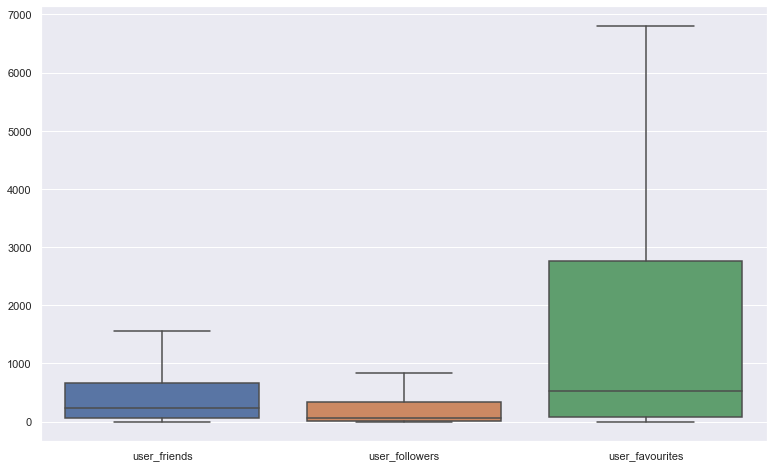

In [13]:
sns.boxplot(data = \
            user_df.loc[:, ["user_friends", "user_followers", "user_favourites"]], \
            showfliers = False) #Create a box plot with the columns of user_friends, user_followers, user_favourites
                                #removing the outliers from the figure


#By plotting user friends, followers, and favourites and removing outliers we see that most accounts
#usually have higher medians for favourites than friends and lastly followers. We also see that 
#user favourites have a greater interquatile range than the other two columns. 

In [14]:
#Next to gauage influence we are going to look at the top accounts in the dataset with the most followers
#We are going to look at verified and unverified accounts

In [15]:
verified_mask = user_df["user_verified"] == True  #Creates mask to filter out verified and unverified accounts
columns =["user_name", "user_description", "user_followers"] #Creates list of necessary columns

#Next we want to see what are the top accounts with the most followers

In [16]:
verified_followers = user_df.loc[verified_mask, columns]\
                     .sort_values(by="user_followers", ascending=False)\
                     .head(10) #Create a new dataframe with only verified accounts and necssary columns, 
                               #sort them in descending order, and only grab the top 10 values

verified_followers #Print new dataframe

#Most verified accounts with the most followers seem to be news sites with the MLB and Binance being the exceptions

,user_name,user_description,user_followers
1973816,Reuters,"Top and breaking news, pictures and videos fro...",24131346.000
2317111,Forbes,"Official account of Forbes, the world’s leadin...",17477087.000
1899466,NDTV,Breaking news alerts from India.\n\nInstagram:...,16370108.000
1282138,CGTN,CGTN is an international media organization. I...,13453069.000
1801398,WIRED,Where tomorrow is realized.,10257860.000
168809,TechCrunch,Technology news and analysis with a focus on f...,10073778.000
440540,TIMES NOW,TIMES NOW is India’s most watched English news...,10047902.000
2886189,MLB,Not changing this until someone hits 10 HR,9627767.000
2728202,Binance,The world’s leading blockchain ecosystem and d...,8377226.000
2154919,Hindustan Times,One of India's largest media companies. Latest...,8369164.000


Text(0, 0.5, 'Follower Count (In 10 Millions)')

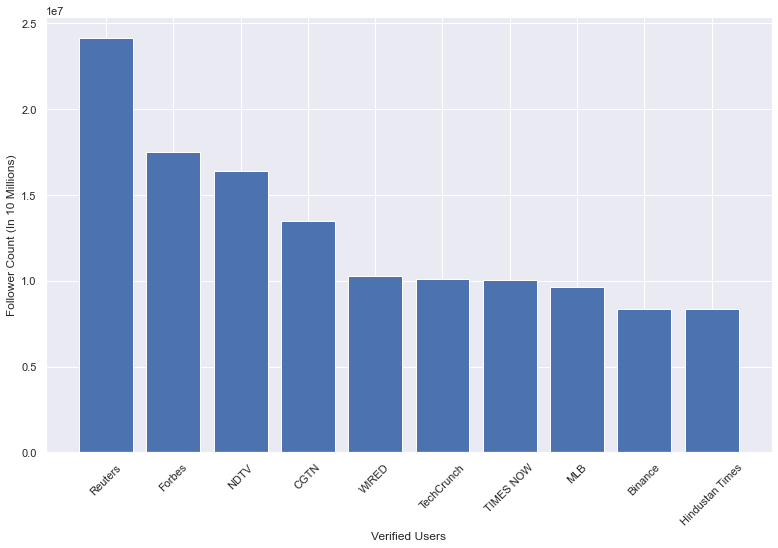

In [17]:
plt.bar(x = verified_followers["user_name"], 
        height = verified_followers["user_followers"]) #Plot barplot of top verified users with the most followers

plt.xticks(rotation = 45) # Rotate tick marks to make it easier to read

plt.xlabel("Verified Users") #Sets x and y labels for figure
plt.ylabel("Follower Count (In 10 Millions)")


In [18]:
unverified_followers = user_df.loc[~verified_mask, columns]\
                       .sort_values(by="user_followers", ascending=False)\
                       .head(10) #Create a new dataframe with only unverified accounts and necssary columns, 
                                 #sort them in descending order, and only grab the top 10 values

unverified_followers #Print new dataframe

#These accounts are more interesting as some my be considered a movement like Anonymous and Bitcoin, some are
#celebraties like Dave Portnoy and Tini Kardashian, while others are traders like WhateCartel and Mr. BIG WHALE

,user_name,user_description,user_followers
498719,Anonymous,We are #Anonymous. The official #YAC. Exposing...,5847544.000
2881648,Bitcoin,Bitcoin is an open source censorship-resistant...,4994662.000
2813572,Jacob Stamp,•NFT Marketing & Crypto Promoter | Influencer'...,3228927.000
2961037,WhaleCartel,In pursuit of global multi-industry decentrali...,2778976.000
2504815,Dave Portnoy,El Presidente/3 time Bee Sting survivor. I own...,2736291.000
1458249,Rodrigo Heralzate 💎NFT💎,💎 Social Media Influencer and Crypto Enthusias...,2651891.000
3000055,KateMillerCZ,Grow your business with me. 📨 DM me for market...,2604261.000
2246916,Jack Heralz 💎,Moon 🌕\nMarketing strategist 🚀\nSmart contract...,2414153.000
2537123,Mr. BIG WHALE,#Bitcoin #BNB #Ethereum #Solana #AVAX #Tron #A...,2409775.000
2237964,Tini Kardashian 💎,• Physical Education 📚 Fitness🏋️‍♀️ Spinning 🚴...,2316113.000


Text(0, 0.5, 'Follower Count (In Millions)')

C:\Users\edgar\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edgar\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


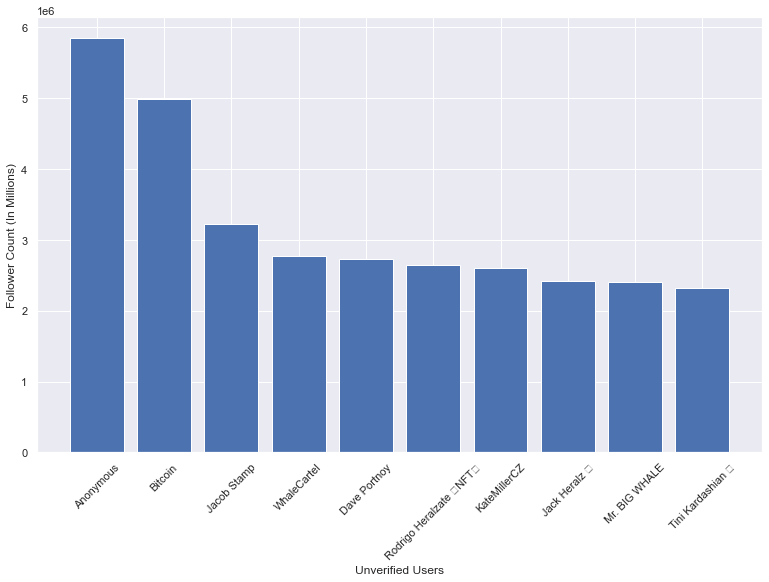

In [19]:
plt.bar(x = unverified_followers["user_name"], 
        height = unverified_followers["user_followers"]) #Plot barplot of top unverified users with the most followers

plt.xticks(rotation = 45) # Rotate tick marks to make it easier to read

plt.xlabel("Unverified Users") #Sets x and y labels for figure
plt.ylabel("Follower Count (In Millions)")

## Most Frequent Posters

In [20]:
#Next we are going to analyze the most frequent posers in our data. We have an idea that the most frequent posers are
#going to be traders or news articles

In [21]:
user_created_posts = df.groupby("user_created")["text"]\
                        .count().sort_values(ascending = False)\
                        .reset_index()  #Creates a new dataframe by doing a groupby on the user_created column
                                        #isolating the text column and aggregating by applying the count function
                                        #Next we sort the data in descending order and we reset the index to 
                                        #turn the groupby dataframe into a regular dataframe


user_created_posts.rename(columns = {"text": "count"}, inplace = True) #Rename the columns inplace avoiding a new identity
                                                                       #statement

    
print(user_created_posts.describe()) #Prints summary statistics for the count column in our new dataframe

user_created_posts #Prints our new user post dataframe


#To isolate the most frequent posters we have to create a new dataframe that takes into account unique users with
#total tweet counts. To do this we are going to create a groupby object using the user_created column. We are using
#this column because as we have mentioned before it is a unique identifyer for users. After creating the groupby object
#we are going to aggregate the text column which subsitues as a tweet id column and aggregate using the count function. 
#This will give us a count of the number of tweets made by unique users. Next we reset the index and rename the columns
#to more interact with the data easier


#From this new dataswet we see that the most of the users in the dataset only have 3 tweets in the dataset, while the 
#max twitter user has 13,141 tweets in the dataset. We see that the median and mean are drastically different 
#indicating that our data is being skewed to the right by frequent posters

           count
count 449734.000
mean       6.735
std       79.164
min        1.000
25%        1.000
50%        1.000
75%        3.000
max    13141.000


,user_created,count
0,2012-12-30 21:55:51,13141
1,2021-10-17 23:36:14,12371
2,2018-01-03 13:46:13,11885
3,2021-10-02 12:31:40,11440
4,2012-06-25 04:38:20,11196
...,...,...
449729,2019-09-21 01:07:08,1
449730,2019-09-20 23:32:19,1
449731,2019-09-20 23:16:57,1
449732,2019-09-20 21:47:24,1


<AxesSubplot:ylabel='count'>

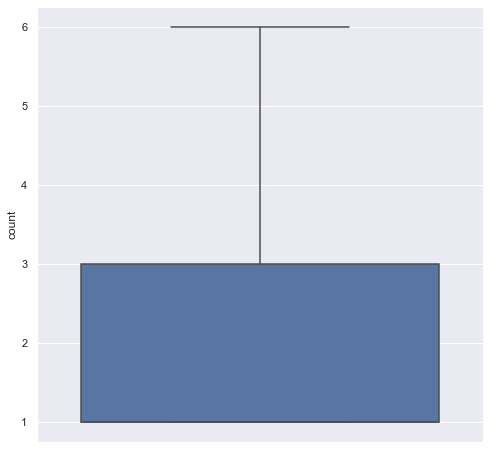

In [22]:
sns.set(rc = {'figure.figsize':(8,8)}) #Change the figure size

sns.boxplot(y = "count", data = user_created_posts, showfliers = False) #Plot a boxplot for the count in our new dataframe
                                                                        #remove the outliers from boxplot

#While plotting the counts of posts by users in a seaborn boxplot we see that users who have more than 6 posts in 
#the dataset are considered outliers. This is shocking as the median is 1 and the mean is 6. This means there are 
#a few accounts that are posting very frequent skewing our data. 

In [23]:
#To investigate who the top posters are we are going to merge our user post dataframe with the full dataframe to grab
#the user_names and user_descriptions of the top posters

In [24]:
top_ten_posters_id = user_created_posts.head(10) #Isolate the top 10 rows in our dataframe
top_ten_posters_id #Print our new dataframe

#We are going to use this dataframe to merge with the full dataframe

,user_created,count
0,2012-12-30 21:55:51,13141
1,2021-10-17 23:36:14,12371
2,2018-01-03 13:46:13,11885
3,2021-10-02 12:31:40,11440
4,2012-06-25 04:38:20,11196
5,2022-03-10 14:06:46,10972
6,2014-01-07 23:52:46,10885
7,2013-12-05 23:34:07,10018
8,2015-05-02 16:54:25,9308
9,2021-01-09 15:26:06,9123


In [25]:
top_ten_merge = top_ten_posters_id.merge(df.loc[:, ["user_name", "user_created", "user_description"]], \
                 on = "user_created") #This inner merges our top ten dataframe to the full dataframe to get the columns
                                      #user_name, user_created, and user_description

top_ten_posters = top_ten_merge.drop_duplicates(subset = ["user_created"]) #This drops duplicates with the same
                                                                           #user_created values isolating unique users
    
top_ten_posters #Prints new merged dataframe
    
#Next we have to get user_name and user_description info. To do this we have to merge our top_ten_posters_id to
#the full dataframe and isolate those columns. From this we see that our hypothesis might be correct by glancing
#at the user_descriptions of the top posters. 

,user_created,count,user_name,user_description
0,2012-12-30 21:55:51,13141,Hoba Bot (Crypto),Fearless like a Honey Badger... Bears or Bulls...
13141,2021-10-17 23:36:14,12371,ExchangeWhales🐋,Stay up to date on the biggest cryptocurrency ...
25512,2018-01-03 13:46:13,11885,DYOR.net Dev & Bot,Co-managed account by both https://t.co/xWYEwN...
37397,2021-10-02 12:31:40,11440,Bitcoin_Whale_Alert,The most advanced #BTC bitcoin tracker and ana...
48837,2012-06-25 04:38:20,11196,Brett Murphy,#affiliate #affiliatemarketing #bitcoin #busin...
60033,2022-03-10 14:06:46,10972,Live Price Crypto,I Tweet the latest #Bitcoin & #Ethereum price ...
71005,2014-01-07 23:52:46,10885,BitcoinAgile,"Breaking News. Bitcoin, Blockchain & Beyond. #..."
81890,2013-12-05 23:34:07,10018,coinOK,Now part of the Dogecoin community.
91908,2015-05-02 16:54:25,9308,#MakeADifference,Are you ready to make a difference?\n\nGet $10...
101216,2021-01-09 15:26:06,9123,Bitcoin updates,I tweet about the #Bitcoin price.\nData is ret...


Text(0, 0.5, 'Number of Posts')

C:\Users\edgar\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128011 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\edgar\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128011 missing from current font.
  font.set_text(s, 0, flags=flags)


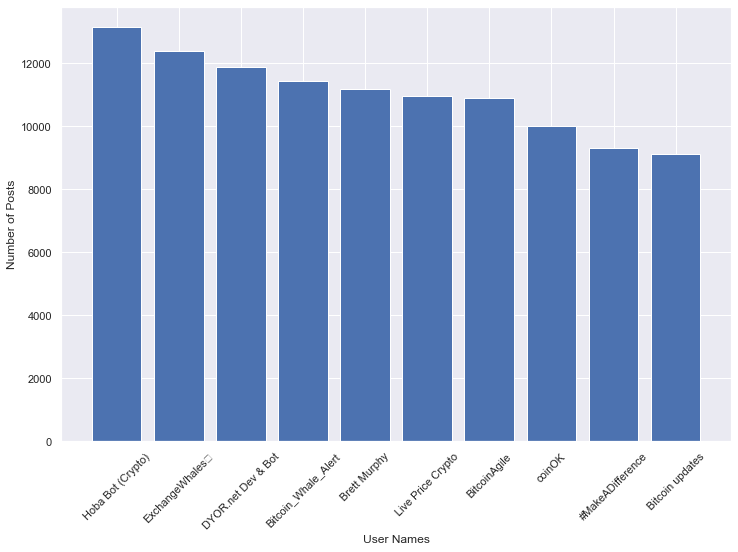

In [26]:
sns.set(rc = {'figure.figsize':(12,8)}) #Set figure size
        
plt.bar(x = top_ten_posters["user_name"], height = top_ten_posters["count"]) #Plot bar chart of users and counts
plt.xticks(rotation = 45) # Rotate tick marks to make it easier to read

plt.xlabel("User Names") #Sets x and y labels for figure
plt.ylabel("Number of Posts")

#The most frequent poster ended up being Hoba Bot next to Exchange Whales and DYOR.net Dev & Bot. These accounts all seem
#to be trading accounts

In [27]:
for description in top_ten_posters["user_description"]:
    print(description + '\n')
    
#By running a for loop we can create a list of the top users's user_description. This allows us to see that 
#most of the top posters are indeed crypto traders and trackers

Fearless like a Honey Badger... Bears or Bulls not important we will fight This signals only testing... #DYOR, #YTD Telegram: https://t.co/Ld2sOeugP3

Stay up to date on the biggest cryptocurrency trades or liquidations on exchanges. 
#FTX #Binance #Kraken #Bybit #Bitcoin #Ethereum #Btc #Eth $BTC $ETH

Co-managed account by both https://t.co/xWYEwNSENe Dev & Bot
Bot gives scan results. Dev gives bullshit.
#Bitcoin #BTC #Altcoins #Alts #Cryptocurrency

The most advanced #BTC bitcoin tracker and analytics system reporting large and interesting transactions as they happen.

#affiliate #affiliatemarketing #bitcoin #business #crypto #cryptocurrency #deals #discount #gifts #marketing #shopping #socialmedia #travel #twitter #webtalk

I Tweet the latest #Bitcoin & #Ethereum price every 1 min. Created the 20/03/2022

Breaking News. Bitcoin, Blockchain & Beyond. #bitcoin #blockchain #ethereum #cryptocurrency #crypto #trading #TA #charts $btc $eth

Now part of the Dogecoin community.

Are you rea

# Tweet Data

In [28]:
#Moving forward we are going to look that tweet data

In [29]:
df["month"] = df["date"].dt.to_period("M") #Creates new column for each month period out of the tweet date column

#We are going to add an new column called month so we can track how mant tweets we have every month

In [30]:
min_tweet_date = df["date"].min() #Creates variables for f string
max_tweet_date = df["date"].max()

print(f'The earliest tweet data we have is {min_tweet_date}, and the most recent is {max_tweet_date}')

The earliest tweet data we have is 2021-02-05 10:52:04, and the most recent is 2022-04-22 23:59:57


Text(0, 0.5, 'Number of Tweets')

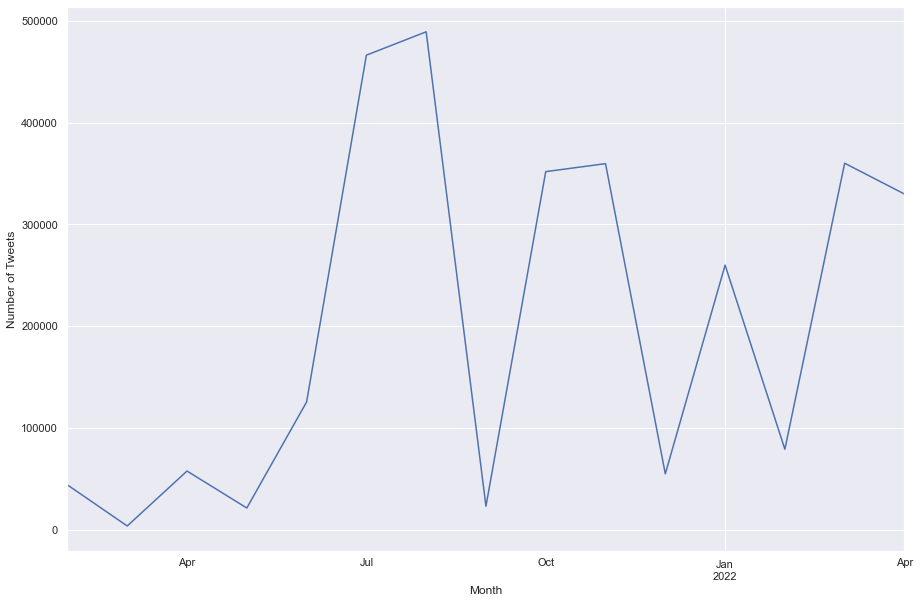

In [31]:
plt.figure(figsize=(15,10)) #Sets figure size
df.groupby("month").size().plot.line() #Plots the amount of tweets that came in throughout the date range, organized by month

plt.xlabel("Month") #Sets x and y labels for figure
plt.ylabel("Number of Tweets")

#Plotting the number of tweets per month we see that we have spikes in July & August 2021 followed by a sharp
#decline in September. Furthur investigation is needed to determine potential causes

<AxesSubplot:xlabel='date', ylabel='Count'>

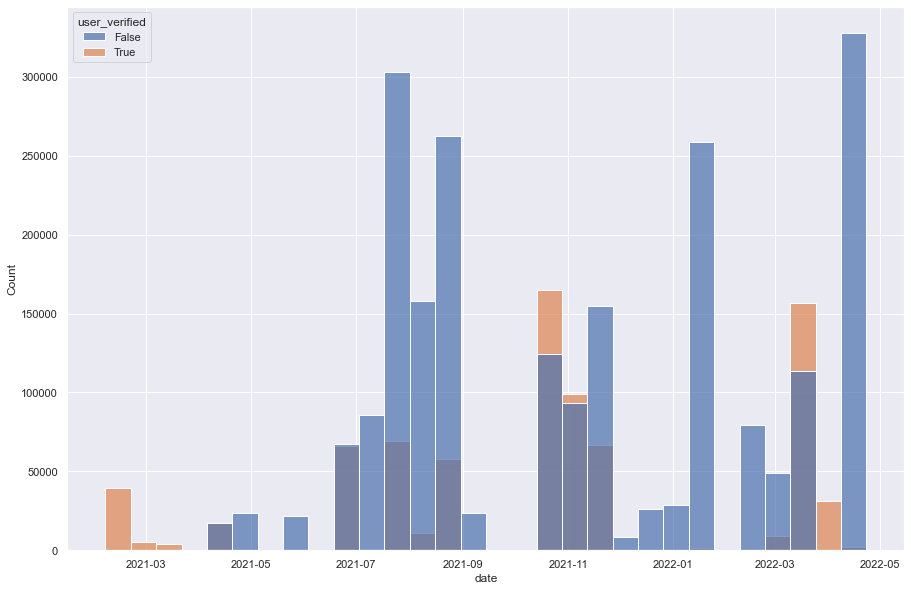

In [32]:
fig = plt.figure(figsize = (15, 10), facecolor = 'white') #Sets figure size

sns.histplot(data = df, x = 'date', alpha = 0.7, hue = "user_verified", bins = 30) #Plots histogram for number of tweets 
                                                                                   #each month for verified and unverified 
                                                                                   #users
        

#In this histogram we see that we have a spike of unverified users posting in July - August 2021 followed by a sharp decline
#in October. We also see that most verified users posted in Novemver of 2021. I looks like something might have 
#happened in October to cause tweets to drastically decrease. 

## Source

In [33]:
#Next we are going to look at the source column. This column tracks what system was used to make a tweet. This is 
#important to see since there are many other tools besides the basic apps to make tweets from

Twitter for Android   0.303
Twitter Web App       0.257
Twitter for iPhone    0.191
IFTTT                 0.015
dlvr.it               0.011
TweetDeck             0.008
ContentStudio.io      0.007
Twitter for iPad      0.006
HoBaBot               0.004
Hootsuite Inc.        0.004
Name: source, dtype: float64


Text(0, 0.5, 'Tweet Source')

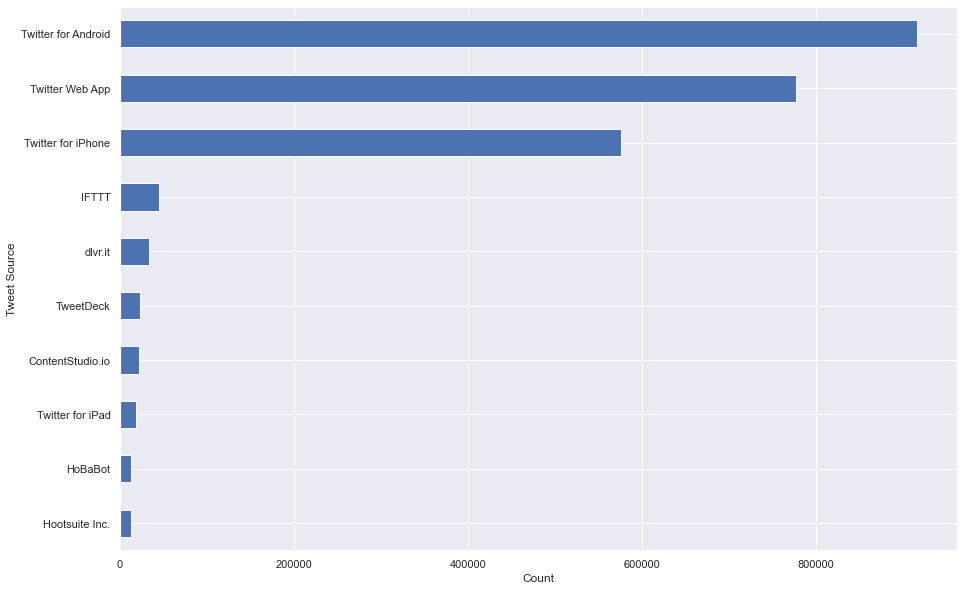

In [34]:
plt.figure(figsize=(15,10)) #Sets figure size
print(df["source"].value_counts(normalize = True).head(10)) #Gets a normalized value counts of the top ten sources
df["source"].value_counts().head(10).sort_values().plot.barh() #Plots horizontal count of the top ten sources 

plt.xlabel("Count") #Sets x and y labels for figure
plt.ylabel("Tweet Source")


#Looking at the ten tweet sources we see that the general apps are the most used to post (Iphone, Android, Web)
#After that we have a steep drop and the next apps are automated services for twitter
#posting like IFTTT, dlvr.it, TweetDeck, ContentSudio.io, and Hootsuite Inc.
#We also see that HoBaBot is a source listed referencing the most frequent poster Hoba Bot

## Character Length

In [35]:
#We are now going to analyze the character length of tweets. This will give us an idea of whether bitcoin tweets cointtain
#many characters or whether they are short.

count   3028948.000
mean        184.841
std          82.230
min           9.000
25%         119.000
50%         186.000
75%         259.000
max         987.000
Name: character_length, dtype: float64


<AxesSubplot:xlabel='character_length', ylabel='Count'>

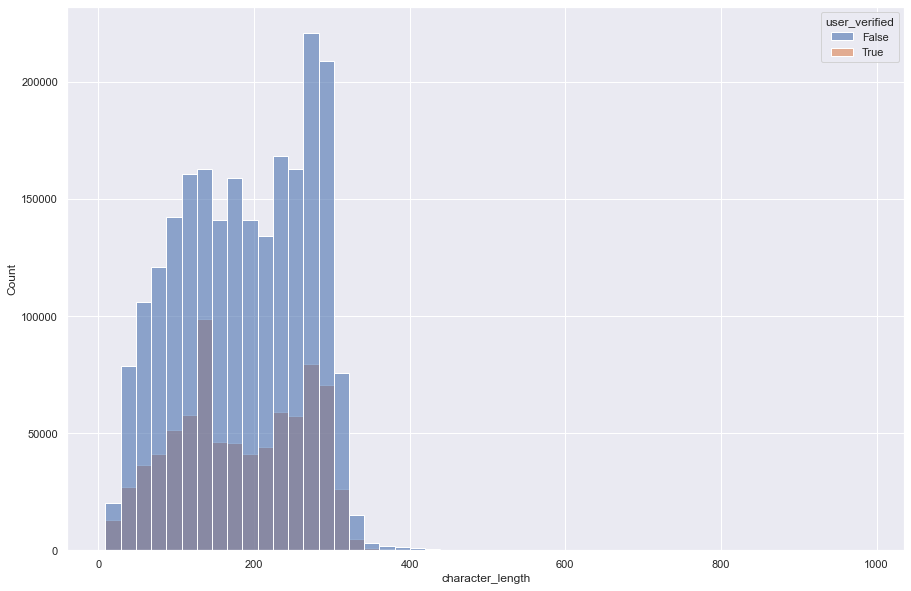

In [36]:
fig = plt.figure(figsize = (15, 10), facecolor = 'white') #Sets figure size

print(df["character_length"].describe())

sns.histplot(data=df, x="character_length", hue = "user_verified", bins = 50, alpha = 0.6) #Plots character length with
                                                                                           #with user_verified column

#By looking at the summary statistics we see that the median and mean or relatively the smae meaning that the data does
#not have as much skew as the previous columns we have looked at. It is also important to note that twitters character
#max is 260 however there are exceptions like @'ing' someone and referencing your previous tweets. 

#We see from the histogram we have outliers skewing out data a bit making it hard to read the histogram. This might be
#input errors as it is highly unlikely for actual tweets to have over 1000 characters. 

In [37]:
df_charater_len = df.loc[df["character_length"] < 400, :] #Removes rows that have above 400 character length

<AxesSubplot:xlabel='character_length', ylabel='Count'>

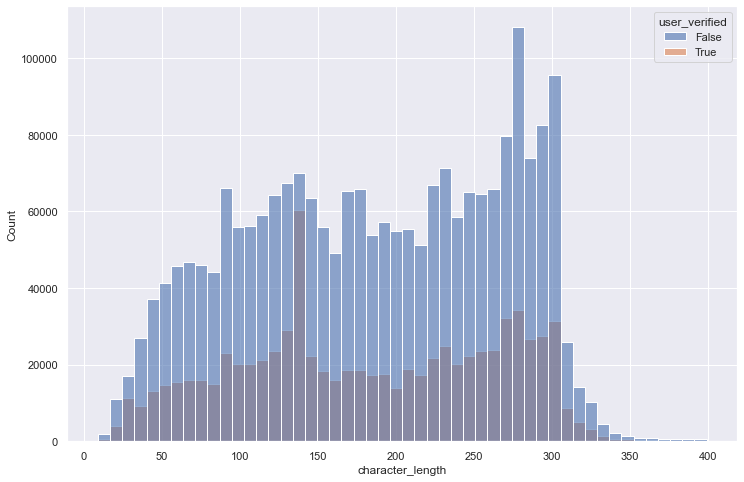

In [38]:
sns.histplot(data=df_charater_len, x="character_length", hue = "user_verified", bins = 50, alpha = 0.6) #Plots histogram
                                                                                                        #without outliers

#After removing outliers we see that we have a small spike in verified tweets at around 130 characters. 
#We also see that most unverified users spike around 260 characters. Tweets also do not go over 300 characters. 
#We see that this graph is kinda flat and does not spike and drop off as much

## Text Complexity

In [39]:
#Now we are going to look at the distribution of text complexity in our data

In [40]:
print(df["text_complexity_score"].describe())
complexity_df = df.loc[df["text_complexity_score"] > -100, :] #This removes rows with a complexity score of below -100

#Looking at our data we also have a lot of outliers skewing our results to the left. This must by because of the nature
#of tweets where users can talk in slang and use a ton of emjois that are hard to analyze. To have a better analysis
#we are going to remove all rows that have a comlexity score of lower than -100

count   3028948.000
mean         45.964
std          34.681
min       -2894.610
25%          28.850
50%          48.470
75%          67.760
max         183.150
Name: text_complexity_score, dtype: float64


<AxesSubplot:xlabel='text_complexity_score', ylabel='Count'>

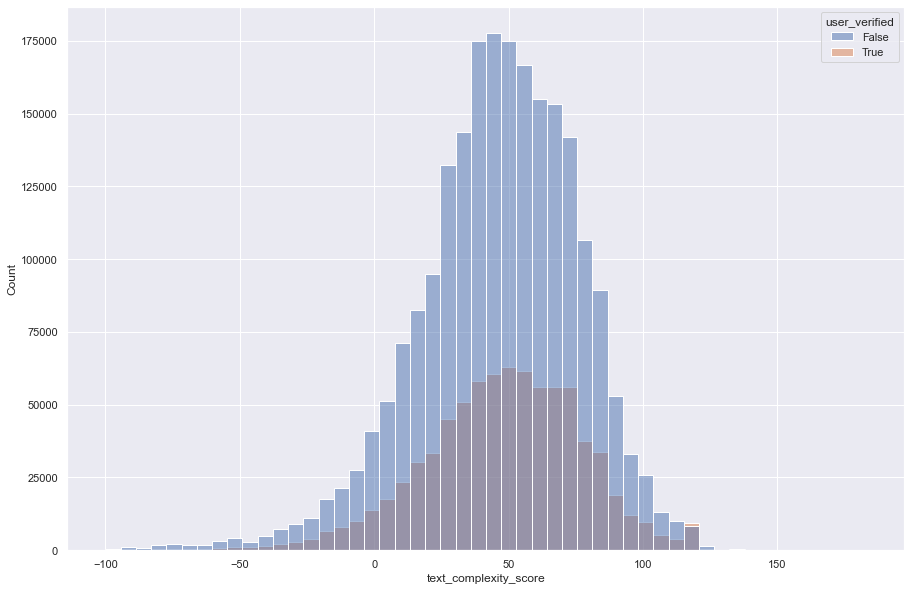

In [41]:
fig = plt.figure(figsize = (15, 10), facecolor = 'white') #Sets figure size
sns.histplot(data= complexity_df, x="text_complexity_score", hue="user_verified", bins=50) #Plots text complexity histogram
                                                                                           #with user_verified column
    
    
#From this histogram we see that most of our data lands in the range of 30 to 70 score. According to textstat if a value 
#is 0-29 it is very confusing, 30-49 it is diffifult to understand, if it is 50-59 it fairly difficult, and 60-69 it 
#is standard. Our text might have a low sore on average becuase of the many emojis contained in a tweet. We also see 
#that verified and unverified tweets follow the same trend as unverified posters.

# Textual Data

In [42]:
#Next step is to analyze textual data contained in each tweet. To do this we are going to conduct an N-Gram analysis
#as well as a Name Entity Recognition Analysis

## N-Grams

In [43]:
#For this analysis we are going to look at the top monograms, bigrams, and trigrams in the dataset. This will allow us
#to see what were the most repeated words

In [44]:
monogram_frequency = pd.read_csv("Data/monogram_frequency.csv") #Load previously calculated frequency tables
bigram_frequency = pd.read_csv("Data/bigram_frequency.csv") 
trigram_frequency = pd.read_csv("Data/trigram_frequency.csv") 

#To begin we are going to load in our N-Grams Frequency Tables

Text(0, 0.5, 'Monograms')

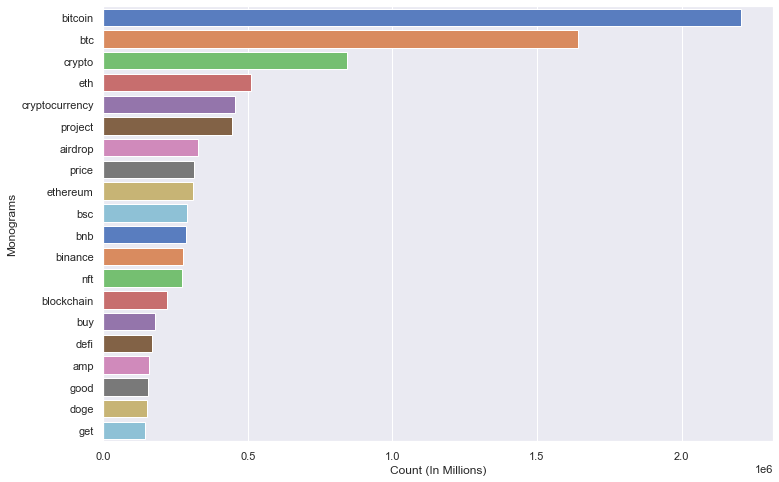

In [45]:
sns.barplot(data = monogram_frequency, y = "n_gram", x = "count", palette = 'muted') #Create a bar chart with N-Gram and counts

plt.xlabel("Count (In Millions)") #Sets x and y labels for figure
plt.ylabel("Monograms")

#By graphing the top 20 most occuring words we see it dominated by crypto terms like bitcoin, crypto, eth, and so forth.
#What is interesting is what the words price and project appear on the list. This means that there are a ton of tweets
#that talk about the price of something and projects being worked on in the crypto space

Text(0, 0.5, 'Bigrams')

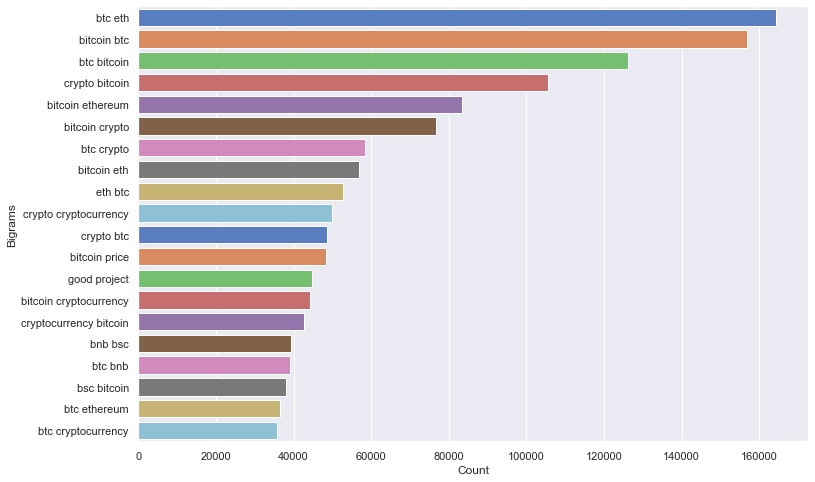

In [46]:
sns.barplot(data = bigram_frequency, y = "n_gram", x = "count", palette = 'muted') #Create a bar chart with N-Gram and counts


plt.xlabel("Count") #Sets x and y labels for figure
plt.ylabel("Bigrams")

#When looking at the bigrams we again see only bitcoin terms. What we see alot is pairs of bitcoin and etheruem. This
#could be because people are simply tweeting referencing all major cryptocurrencies like bitcoin and etheruem or it
#could be people comparing bitcoin and ethereum. Other interesting bigrams are good project and bitcoin price. This again
#allows us to see that a lot of tweets are talking about project being worked on and the current price of bitcoin

Text(0, 0.5, 'Trigrams')

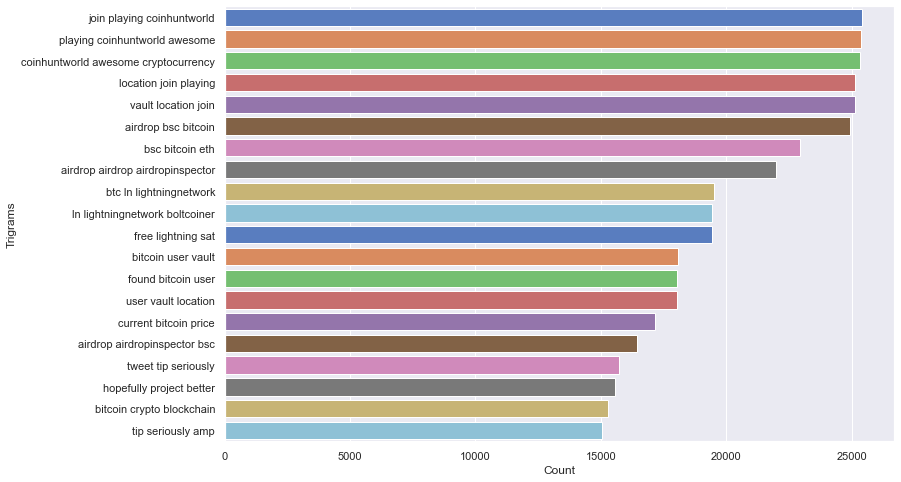

In [47]:
sns.barplot(data = trigram_frequency, y = "n_gram", x = "count", palette = 'muted') #Create a bar chart with N-Gram and counts

plt.xlabel("Count") #Sets x and y labels for figure
plt.ylabel("Trigrams")

#In the trigrams we see the top trigrams being related to the coinhuntworld project. This could be mass effort to promote 
#the project or it could be many spam accounts tweeting about this project. Again we also see tweets about the current
#bitcoin price and projects. 

## NER General

In [48]:
ner_general_df = pd.read_csv("Data/ner_general_df.csv") #Load previously calculated frequency tables
ner_cardinal_df = pd.read_csv("Data/ner_cardinal_df.csv")
ner_date_df = pd.read_csv("Data/ner_date_df.csv")
ner_gpe_df = pd.read_csv("Data/ner_gpe_df.csv")
ner_org_df = pd.read_csv("Data/ner_org_df.csv")
ner_person_df = pd.read_csv("Data/ner_person_df.csv")


#To begin we are going to load in our NER Frequency Tables

Text(0, 0.5, 'NER General')

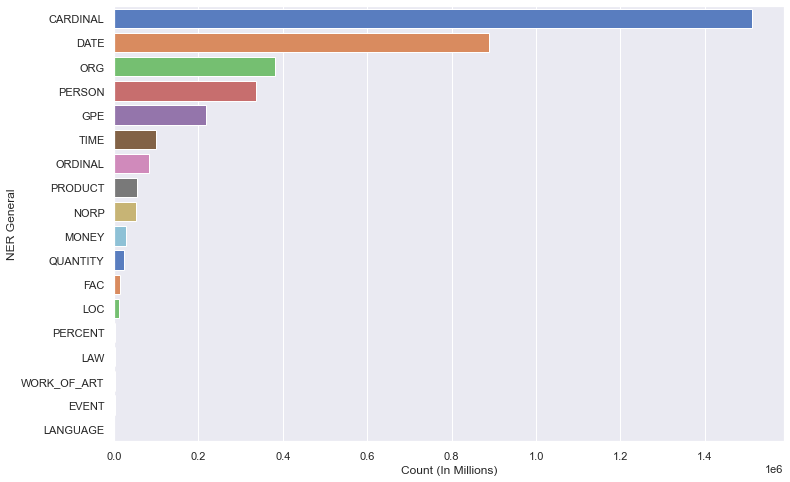

In [49]:
sns.barplot(data = ner_general_df, y= "NER_General", x= "count", palette= 'muted') #Create a bar chart with N-Gram and counts

plt.xlabel("Count (In Millions)") #Sets x and y labels for figure
plt.ylabel("NER General")

#Using Spacy's Named Entity Recognition model on our data it recognized mainly 13 different Named Entities. The general
#named entity that appeared the most is cardinals. This is not surprsing as there would be many tweets referencing 
#numbers whether refering to the price of cyrpto projects, dates, or just general tweeting. We then see Dates, Orgs, 
#people, and GPEs rounding out the top 5 named entities in our data. 

Text(0, 0.5, 'NER Cardinal')

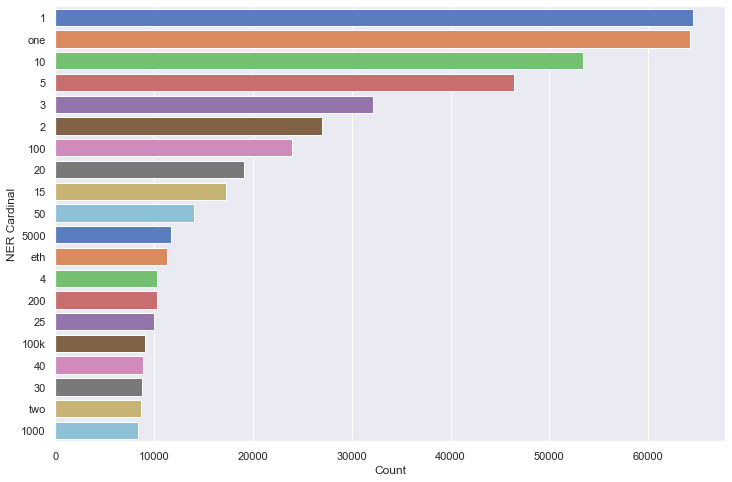

In [50]:
sns.barplot(data = ner_cardinal_df, y = "NER_Cardinal", x = "count", palette = 'muted')

plt.xlabel("Count") #Sets x and y labels for figure
plt.ylabel("NER Cardinal")

#Looking closer at the top occuring cardinals we see general numbers that do not provide much information. What is 
#interesting is the number 100k appearing often which could be a reference to people speculating that bitcoin
#will reach 100k in the near future

Text(0, 0.5, 'NER Date')

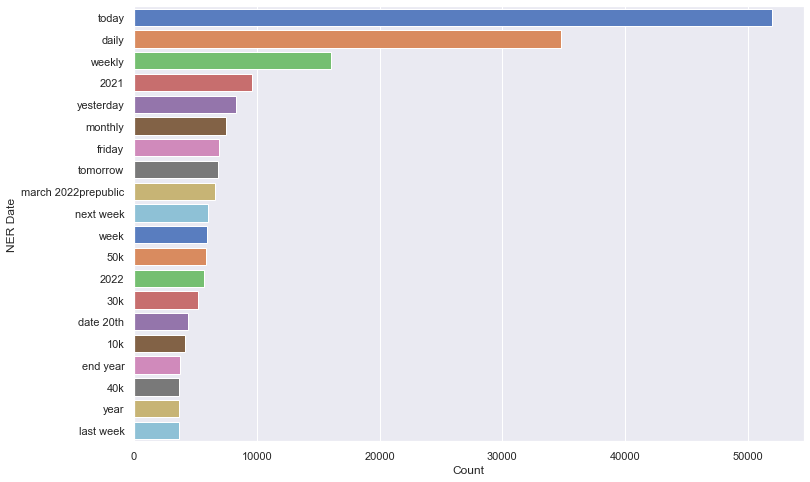

In [51]:
sns.barplot(data = ner_date_df, y = "NER_Date", x = "count", palette = 'muted')

plt.xlabel("Count") #Sets x and y labels for figure
plt.ylabel("NER Date")

#Looking closer at the top occuring Dates we see general dates like today, yesterday, and so forth appear. We also see
#what looks like numbers be wrongly classified as dates such as 50k, 30k, 10k, and 40k. We see today and daily being
#the most occuring topics which could be refering to bitcoin trading calls. 

Text(0, 0.5, 'NER GPE')

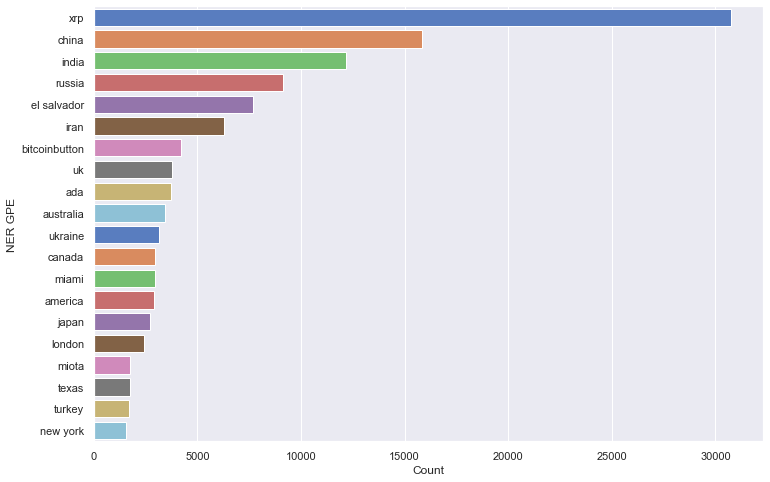

In [52]:
sns.barplot(data = ner_gpe_df, y = "NER_Gpe", x = "count", palette = 'muted')

plt.xlabel("Count") #Sets x and y labels for figure
plt.ylabel("NER GPE")

#Looking at Geographical locations we see that spacy mislabeled xrp and ada which are cryptocurrencies locations.
#What is interesting is that wee see China, india, russia, and el salvador toping the list for the top locations.
#This might top the list as they are frequently involved in breaking crypto news.

Text(0, 0.5, 'NER ORG')

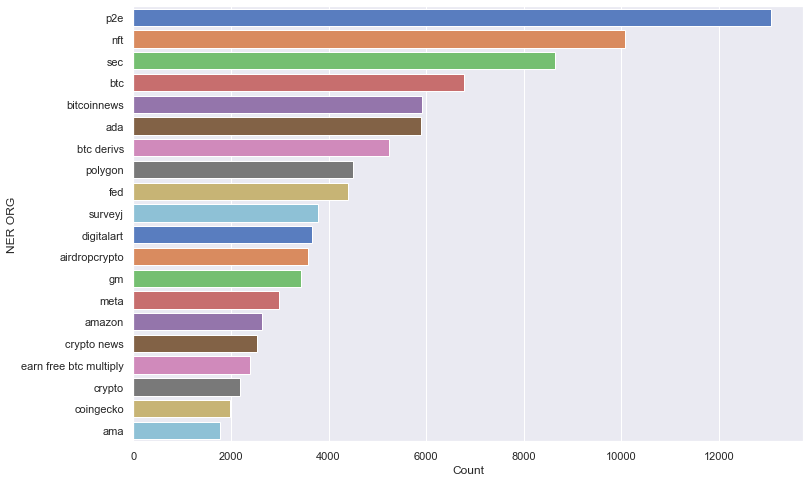

In [53]:
sns.barplot(data = ner_org_df, y = "NER_Org", x = "count", palette = 'muted')

plt.xlabel("Count") #Sets x and y labels for figure
plt.ylabel("NER ORG")

#So far this label has provided the most information. This frequency table lets us see that spacy recognized
#the sec, ada, the fed, meta, and amazon as orgs. It is interesting to see that these orgs were being talked 
#about in the tweets as they are often in the news for crypto related events. Again the model isn't perfect
#as we see it classified topics such as bitcoinnews, crypto news, and nfts wrongly

Text(0, 0.5, 'NER Person')

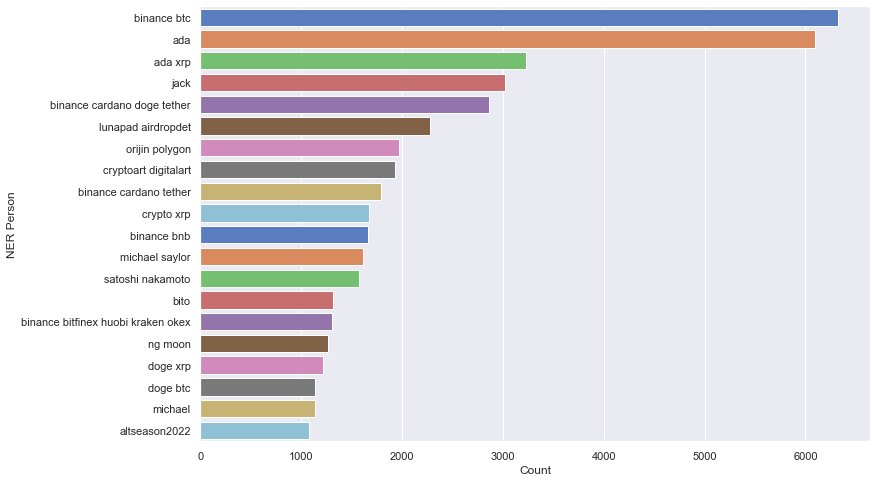

In [54]:
sns.barplot(data = ner_person_df, y = "NER_Person", x = "count", palette = 'muted')

plt.xlabel("Count") #Sets x and y labels for figure
plt.ylabel("NER Person")

#It looks like spacy could not recognize people correctly. Almost all of the top people in the frequency table 
#are not actual people. The only relevant people being recognized are michael saylor and satoshi nakamoto. 

In [55]:
#Although it is interesting to see what spacy's Named Entity Recognition can recognize and count it looks like the model
#still needs more tunning for it to accuratly analyze our specific bitcoin twitter data.

# Next Steps

In [56]:
#This was the initial step into analyzing bitcoin tweets from the past year and a half. The next steps to take this analysis
#further is to considered a more in-depth EDA. This will consist of comparing multiple variables against one another.
#Variables such as text complexity and top N-grams, character length and Named Entities, and so forth. Another potential
#route to take is to do a sentiment analysis. This will be either using a pre-trained model on our textual data to get
#a polarity score, or using exisiting data to create a fined tuned sentiment model to classify our data. This could then
#be compared to the acutal price bitcoin during the time for a correlation analysis. Furtermore, the last route to take is 
#to create a pipeline in which live tweets are comming being pulled from twitters api and the data would flow into a 
#program like tableau where we would be able to analysis tweets in real time. 